In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Directory where the TensorBoard logs are stored
log_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data")

run_folders = [os.path.join(log_dir, run) for run in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, run))]

## 3. Policy Gradeints

### Experiment 1: Cart Pole
Plot Evaluation Average Return against # of environment steps


In [3]:
cartpole_small = [f for f in run_folders if ('pg_cartpole' in f) and ('lb' not in f)]
cartpole_large = [f for f in run_folders if ('pg_cartpole' in f) and ('lb' in f)]

- Small batch runs

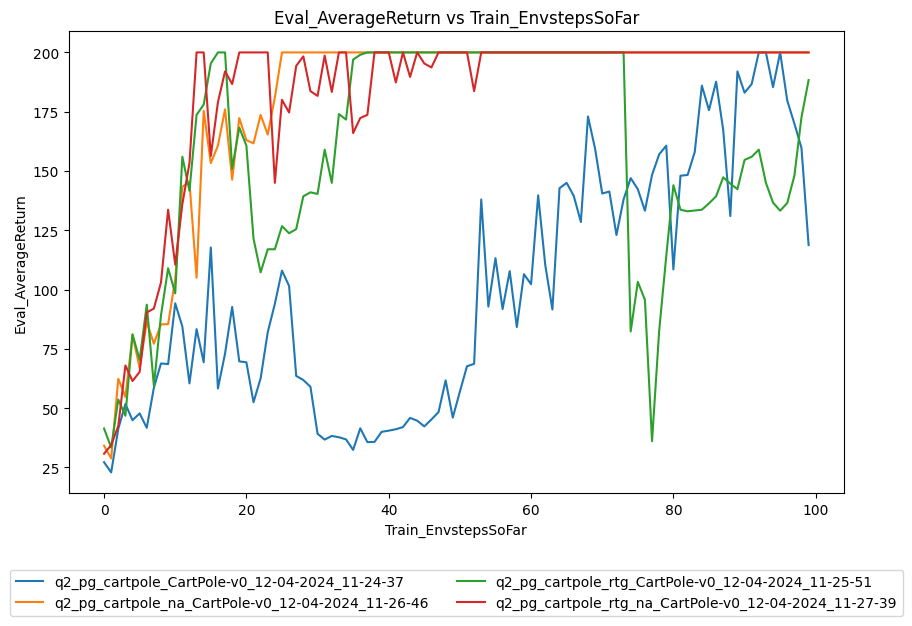

In [4]:
plt.figure(figsize=(10, 6))

# Loop through small_batch run folder to extract and plot the data
for run_folder in cartpole_small:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

- Large batch runs

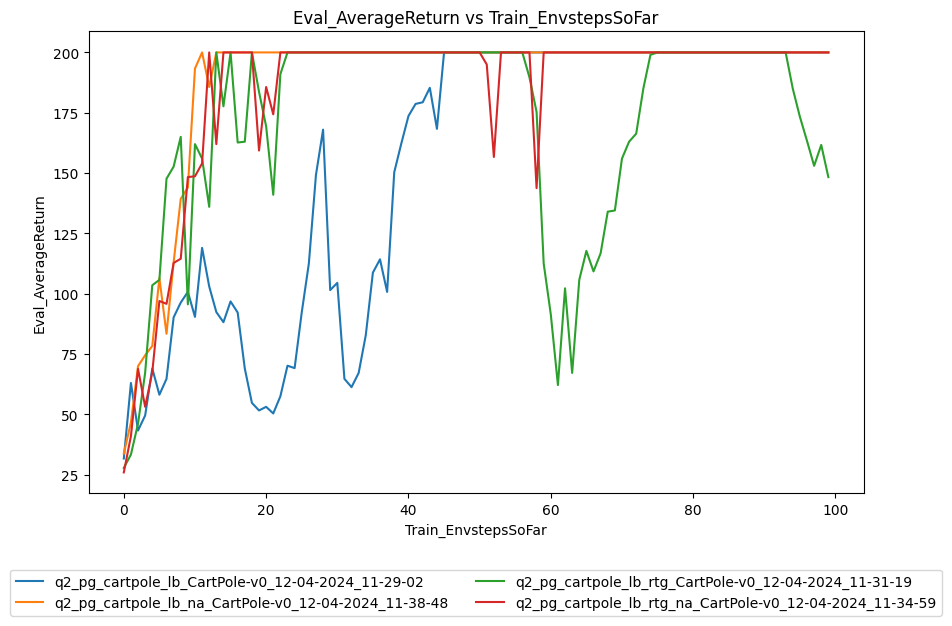

In [5]:
plt.figure(figsize=(10, 6))

# Loop through large_batch run folder to extract and plot the data
for run_folder in cartpole_large:
    event_acc = EventAccumulator(run_folder)
    event_acc.Reload()

    # Extracting values to plot
    try:
        steps = np.array([int(s.step) for s in event_acc.Scalars('Train_EnvstepsSoFar')])
        values = np.array([s.value for s in event_acc.Scalars('Eval_AverageReturn')])

        # Plotting
        plt.plot(steps, values, label=os.path.basename(run_folder))  # using run folder name as label
    except Exception as e:
        print(f"Could not retrieve data for {run_folder}: {e}")

# Adding legends, labels and title
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xlabel('Train_EnvstepsSoFar')
plt.ylabel('Eval_AverageReturn')
plt.title('Eval_AverageReturn vs Train_EnvstepsSoFar')

# Show plot
plt.show()

Answer the following questions briefly:

- Which value estimator has better performance without advantage normalization: the trajectory-centric one, or the one using reward-to-go?
  - *Reward-to-go* 
- Did advantage normalization help?
  - *Yes*
- Did the batch size make an impact?
  - *Seems to have helped when normalization is absent*

## 5. Generalized Advantage Estimation
### Experiment 3: LunarLander-v2

- When $\lambda=0$, GAE becomes $A_{GAE}^{\pi}(s_t, a_t)=\delta_t (s_t, a_t)=r(s_t, a_t) + \gamma V_{\phi}^{\pi}(s_{t+1}) - V_{\phi}^{\pi}(s_t)$, which is equivalent of single-step advantage estimator, with low-variance and high-bias. 
- When $\lambda=1$, GAE becomes  $A_{GAE}^{\pi}(s_t, a_t)=\sum_{t'=t}^{T-1}\gamma^{t'-t}\delta_{t'}$, which is the multi-step actor critic method, with high variance and low bias.


## 7. Humanoid
### Experiment 5. Humanoid-v4

![Experiment 5: Humanoid-v4](images/7-humanoid-v4.jpg)